## Data Analysis Mathematics, Algorithms and Modeling

# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

In the next phase of recepe recommandation system, Data related to user feedback and rating are taken into consideration with the existing recepe data with a view to identify insights about user's preferences and engagement with the recepe. This will help to identify corelation between recepe characteristics and user preferences 

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [43]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

##### RawRecipe : Dataset in classes and methods

In [44]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [45]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [46]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recepe Id

In [47]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


### Data Preprocessing

In [48]:
# Count nutrition for recepe
merged_data['n_nutrition'] = merged_data['nutrition'].apply(lambda x: len(x))
# Convert date into datetime format of python
merged_data['date'] = pd.to_datetime(merged_data['date'])
# Differentiate year from date
merged_data['year'] = merged_data['date'].dt.to_period('Y')
# Differentiate year with month from date
merged_data['month'] = merged_data['date'].dt.to_period('M')

# Sort data with date
processed_data = merged_data.sort_values(by='date')

processed_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,n_nutrition,year,month
559965,jalapeno pepper poppers,992,30,1545,1999-09-06,"['30-minutes-or-less', 'time-to-make', 'course...","[111.4, 14.0, 3.0, 7.0, 8.0, 24.0, 1.0]",11,"['in a mixing bowl , combine cheeses , bacon a...","originally from ""taste of home"" magazine","['cream cheese', 'sharp cheddar cheese', 'mont...",10,2008,992,2000-01-25,5,better than any you can get at a restaurant!,39,2000,2000-01
532444,hooters buffalo wings,3603,27,2353,1999-09-24,"['30-minutes-or-less', 'time-to-make', 'course...","[867.1, 96.0, 2.0, 59.0, 97.0, 128.0, 8.0]",16,"['combine the flour , paprika , cayenne pepper...",from top secret recipes http://www.topsecretre...,"['butter', 'louisiana hot sauce', 'pepper', 'g...",12,2008,3603,2000-01-25,4,better than having to actually GO to a Hooters...,42,2000,2000-01


### Use Case 
Tracking Individual Recipe Choices for Nutritional Consciousness Over Time
We have mapped user review data (including nutritional information) to recipe characteristics span from 2000 to 2018. The objective is to figure out whether individuals have grown more health-conscious over time, particularly by examining the nutritional choices they make in recipes.

***Hypotheses Null Hypothesis:*** As a result of increased nutritional awareness in the recipes people choose, people have grown more health-conscious throughout time. Put another way, as time passes on, users are consuming meals that are higher in nutrients.

***Hypothesis Alternative:*** There has been no discernible improvement in the nutritional content of people's recipe selections. There hasn't been a rise in the nutritional content of the recipes people eat over time.


### Time Series

#### Nutrition consumption vs time between 2000 to 2018 : Scatter plot with average line

e:\Conestoga\PROG8431\PROG8431\venvPROG8431\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


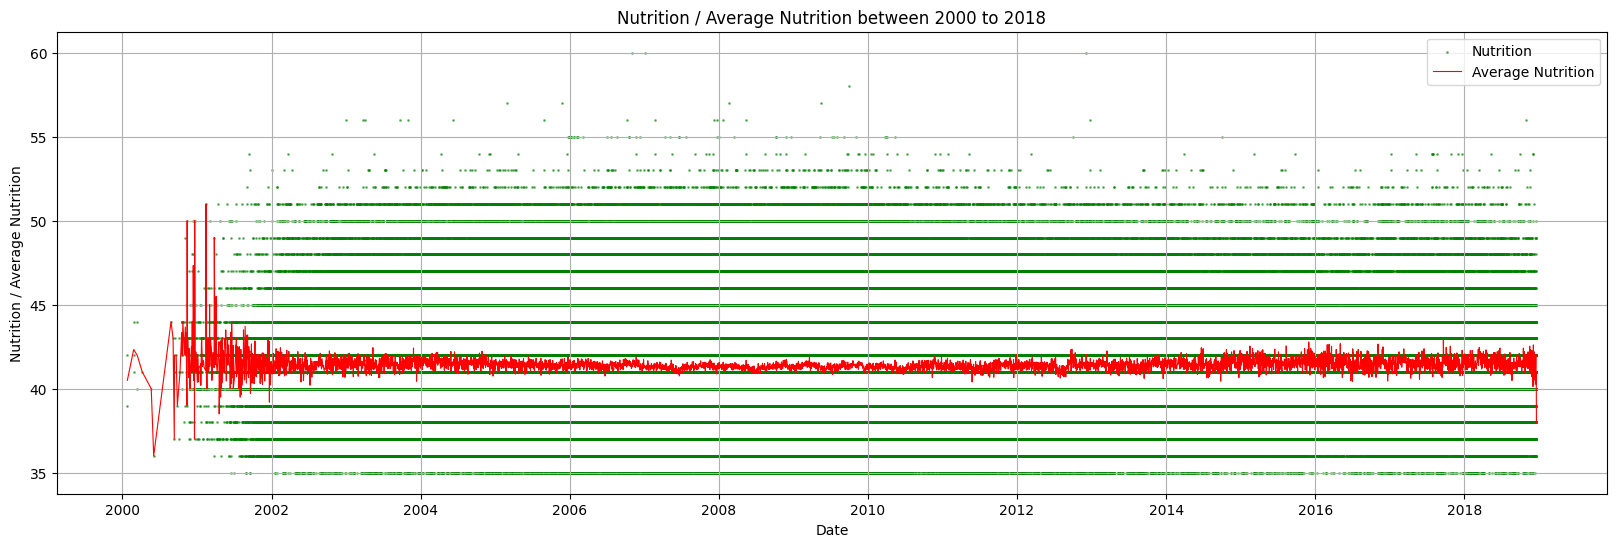

In [49]:

# Calculate average number of nutritioan by date
average_nutrition_by_date = processed_data.groupby('date')['n_nutrition'].mean()

# Set the figure size
plt.figure(figsize=(20, 6))

# Scatter plot for n_nutrition vs. date
plt.scatter(processed_data['date'], processed_data['n_nutrition'], color='g', label='Nutrition', alpha=0.5, s=1)

# Plot the average number of Nutrition over time
plt.plot(average_nutrition_by_date.index, average_nutrition_by_date, color='r', label='Average Nutrition', linewidth=0.8)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Nutrition / Average Nutrition')
plt.title('Nutrition / Average Nutrition between 2000 to 2018')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

#### Total Neutirition vs time 

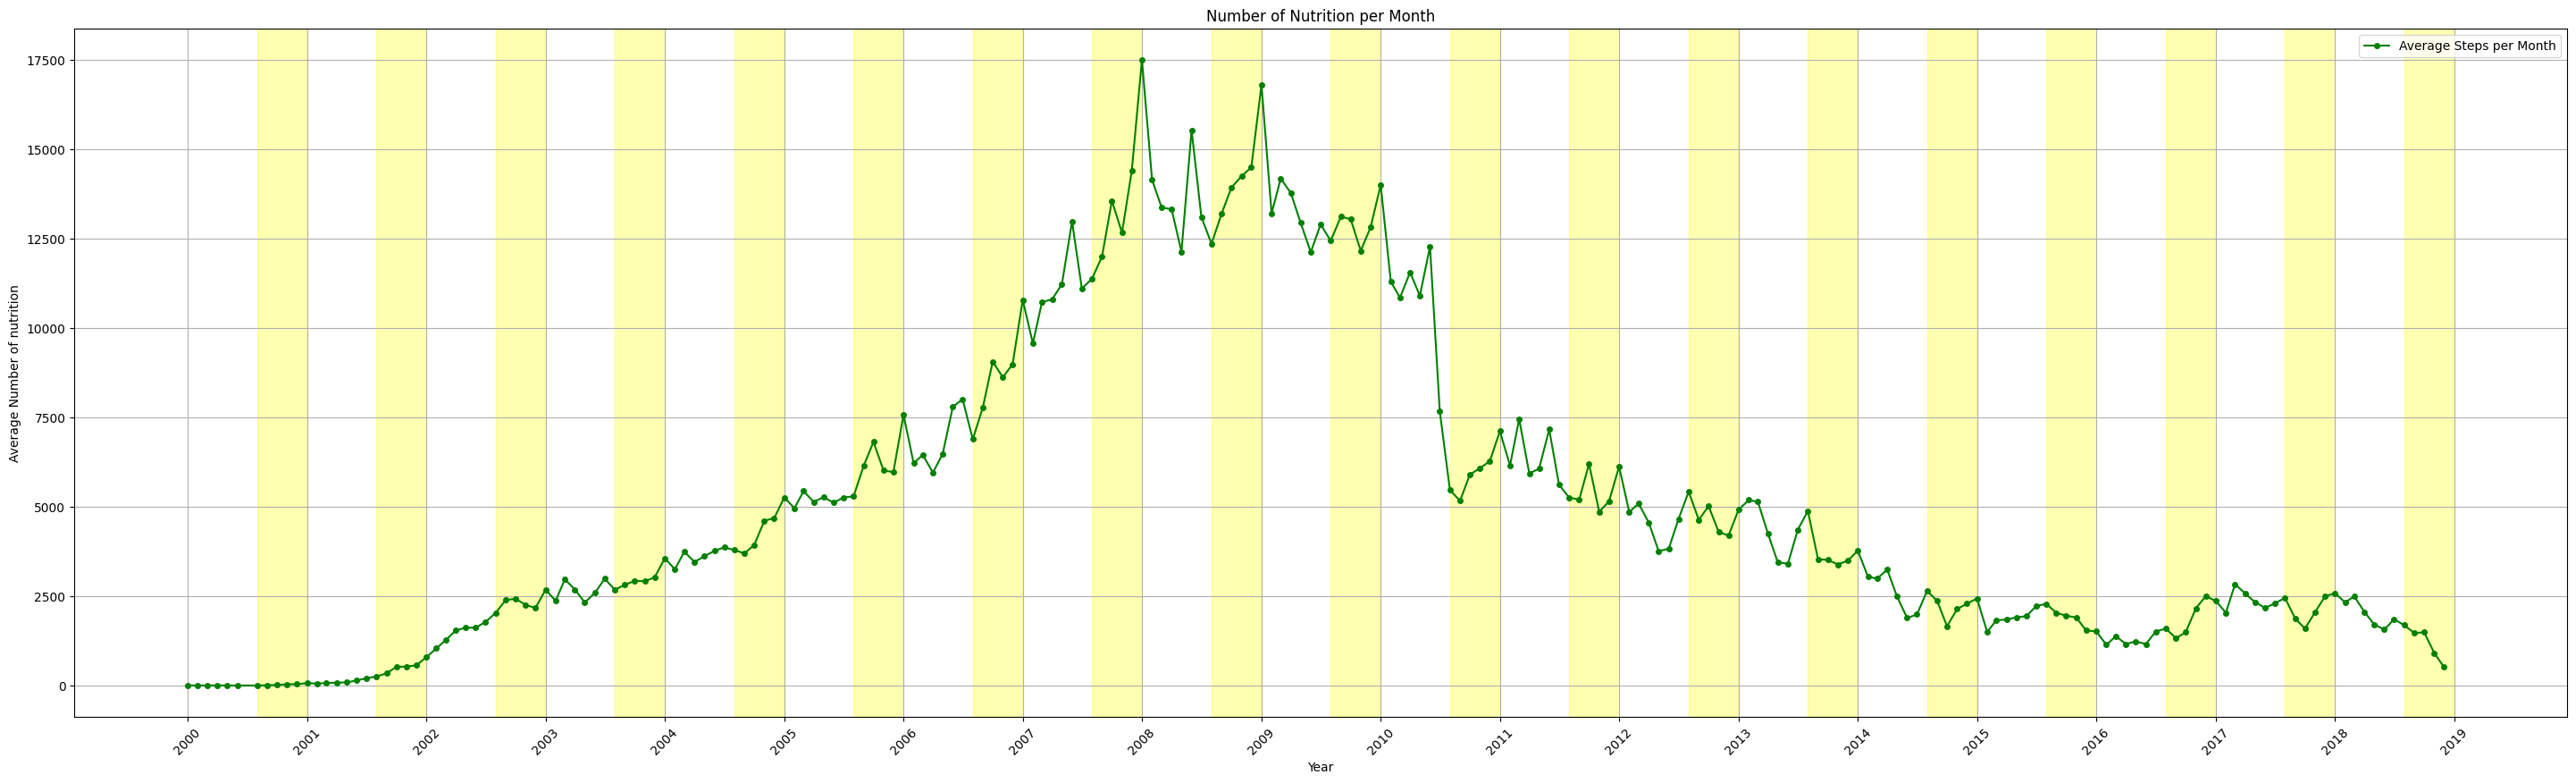

In [50]:
df2 = processed_data
# Convert 'date' column to Period format for monthly grouping
df2['date'] = df2['date'].dt.to_period('M')

# Group by 'date' and count the number of reviews (or steps) for each month
steps_per_month = df2.groupby('date').size().reset_index(name='n_nutrition')

# Convert the 'date' column back to timestamp for plotting
steps_per_month['date'] = steps_per_month['date'].dt.to_timestamp()

# Create a time series plot
plt.figure(figsize=(36, 10))
plt.plot(steps_per_month['date'], steps_per_month['n_nutrition'], marker='o', color='g', label='Average Steps per Month', linewidth=1.5, markersize=4)

# Highlight the specified months (August to January)
for year in range(2000, 2019):
    plt.axvspan(pd.Timestamp(f'{year}-08-01'), pd.Timestamp(f'{year}-12-31'), color='yellow', alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Locator to display every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the ticks to show year only


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Number of nutrition')
plt.title('Number of Nutrition per Month')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()


#### Summary : Trends

The graph shows consistancy in average neutrition value over the time.

The first graph displays an increase in nutrition-related activities that peaked approximately in 2009, then a precipitous drop. The second graph, which spans the years 2002 through 2018, shows steady average nutrition values between 40 and 42. After 2010, there was a decline in submissions, but the quality of nutrition was constant, suggesting that nutritional standards were maintained even with less activity.

### Moving Averages

In [52]:
# Calculate moving averages
window_sizes = [3, 6, 12]  # 3-month, 6-month, and 12-month moving averages

plt.figure(figsize=(20, 10))
plt.plot(processed_data.index, processed_data['n_nutrition'], label='Original', alpha=0.7)

for window in window_sizes:
    processed_data[f'MA_{window}'] = processed_data['n_nutrition'].rolling(window=window).mean()
    plt.plot(processed_data.index, processed_data[f'MA_{window}'], 
             label=f'{window}-Month Moving Average', alpha=0.7)

plt.title('Number of Nutrition with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of Nutrition')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Calculate the ratio of the seasonal component to the trend
seasonal_ratio = decomposition.seasonal / decomposition.trend

# Calculate the standard deviation of this ratio
ratio_std = seasonal_ratio.std()

print(f"Standard deviation of seasonal-to-trend ratio: {ratio_std:.4f}")

if ratio_std < 0.1:  # This threshold can be adjusted based on your specific data
    print("The time series appears to be additive.")
else:
    print("The time series appears to be multiplicative.")

# Plot the seasonal component
plt.figure(figsize=(15, 5))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()

### Deseasonalize

In [ ]:

def deseasonalize_time_series(data, column, period):
    # Ensure the index is datetime
    data = data.set_index('date')
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data[column], model=' multiplicative', period=period)
    
    # Calculate deseasonalized data
    data[f'{column}_deseasonalized'] = decomposition.trend + decomposition.resid
    
    return data, decomposition

# Use the function
period = 12  # Assuming monthly data, use 12 for yearly seasonality
processed_data, decomposition = deseasonalize_time_series(steps_per_month, 'n_nutrition', period)
plt.figure(figsize=(20, 10))
plt.plot(processed_data.index, processed_data['n_nutrition'], label='Original', alpha=0.7)
plt.plot(processed_data.index, processed_data['n_nutrition_deseasonalized'], label='Deseasonalized', alpha=0.7)
plt.title('Original vs Deseasonalized Number of Nutrition')
plt.xlabel('Date')
plt.ylabel('Number of Nutrition')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def plot_decomposition(decomposition):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.show()

plot_decomposition(decomposition)